In [33]:
%matplotlib notebook
%precision 3

from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.rcParams['figure.figsize'] = [20, 5]
plt.rcParams['timezone'] = 'Europe/London'

import pandas

from datetime import datetime

In [7]:
data=pandas.read_csv("output.csv",skipinitialspace=True)
data["datetime"]=pandas.to_datetime(data["Timestamp"], unit='s')
data.set_index("datetime", inplace=True)
#documents1 = data.loc['2020-07-15 00:00:00':]
#documents1[documents1.time_total > 2]


#data["CarId"].unique()
data[data.CarId == "https://google.com"]["time_total"]

datetime
2020-07-20 15:57:22    0.092915
2020-07-20 16:00:55    0.121142
2020-07-20 16:04:56    0.078890
2020-07-20 16:09:10    0.134034
2020-07-20 16:13:58    0.099894
2020-07-20 16:18:03    0.111501
2020-07-20 16:21:12    0.110231
2020-07-20 16:24:49    0.124709
2020-07-20 16:27:27    0.084157
2020-07-20 16:32:18    0.113764
2020-07-20 16:33:31    0.099178
2020-07-20 16:37:10    0.109470
2020-07-20 16:40:47    0.103960
2020-07-20 16:41:39    0.123711
2020-07-20 16:46:46    0.112426
2020-07-20 16:49:15    0.088763
2020-07-20 16:54:13    0.134546
2020-07-20 16:57:15    0.086698
2020-07-20 17:01:38    0.111865
2020-07-20 17:05:43    0.082237
2020-07-20 17:09:31    0.110716
2020-07-20 17:11:56    0.103840
2020-07-20 17:14:16    0.098497
2020-07-20 17:17:22    0.102853
2020-07-20 17:18:30    0.106949
2020-07-20 17:22:40    0.127218
2020-07-20 17:25:14    0.108075
2020-07-20 17:26:29    0.107835
2020-07-20 17:29:55    0.253851
2020-07-20 17:32:00    0.103422
2020-07-20 17:32:40    0.084368

<IPython.core.display.Javascript object>


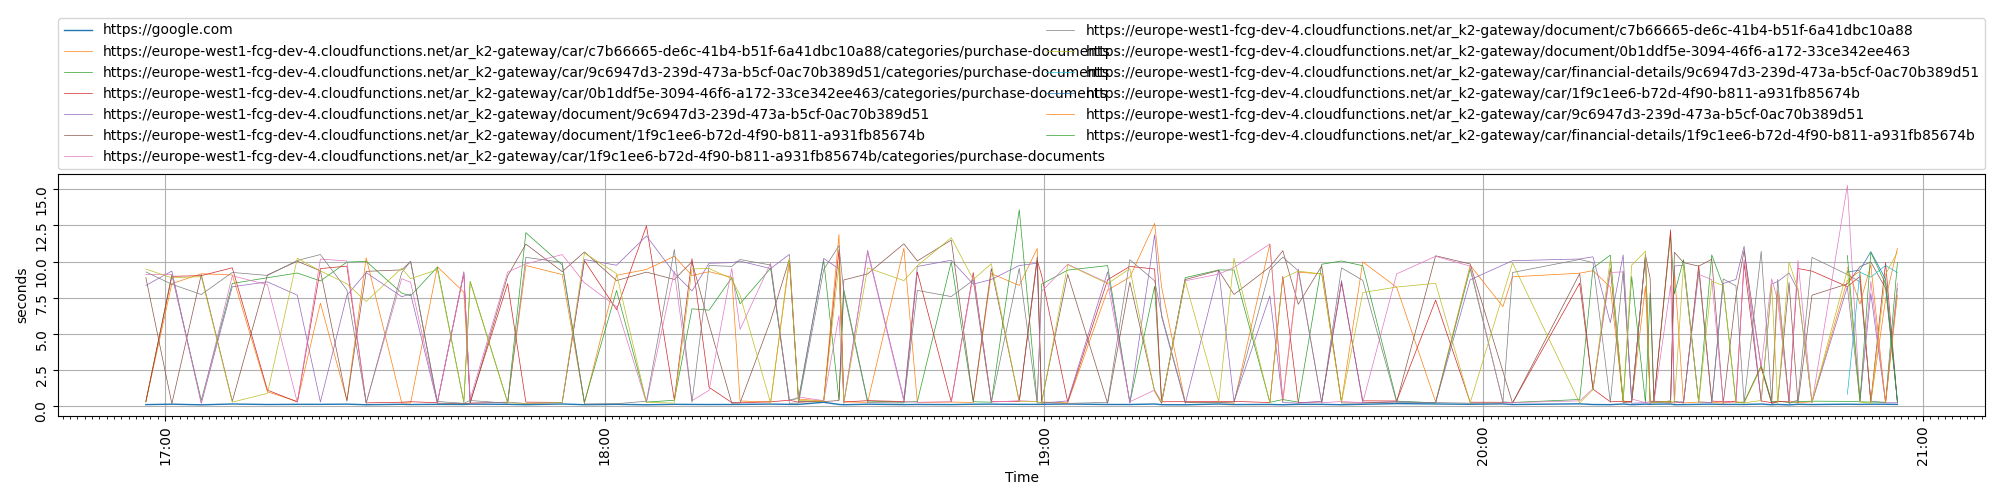

In [34]:
data=pandas.read_csv("output.csv",skipinitialspace=True)
data["datetime"]=pandas.to_datetime(data["Timestamp"], unit='s')
data.set_index("datetime", inplace=True)




plt.figure()
#period = "3600s"
#rolling = data["SNR1"].rolling(period).mean()
#plt.plot(rolling, label=period + " average");

#data = data.loc['2020-07-15 09:00:00':'2020-07-16 01:00:00']


urls = data["CarId"].unique()
i=0
for url in urls:
    i=i+1
    if (url == "https://google.com"):
        plt.plot(data[data.CarId == url]["time_total"], label=url, linewidth=1)
    else:
        plt.plot(data[data.CarId == url]["time_total"], label=url, linewidth=0.5)

plt.ylabel("seconds");
plt.xlabel("Time")

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_major_locator(mdates.HourLocator())
#ax.xaxis.set_minor_formatter(mdates.DateFormatter("%y-%m-%d"))
ax.xaxis.set_minor_locator(mdates.MinuteLocator())

#ax.tick_params(axis='x',which='major')
ax.tick_params(which='both', rotation=90)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')



#plt.legend()
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2)
plt.tight_layout()